In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [240]:
comments = pd.read_csv(r'C:\Users\huynh\Python\Youtube\UScomments.csv', 
                       on_bad_lines='skip')

In [241]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
comments.in

(691374, 4)

In [242]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [243]:
comments.dropna(inplace = True)

In [244]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# Perform Sentiment Analysis - Understand Viewer Emotions!

In [245]:
!pip install nltk

In [246]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\huynh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [247]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [248]:
sia= SentimentIntensityAnalyzer()

In [249]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [250]:
sia.polarity_scores("MY FAN . attendance")

{'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'compound': 0.4648}

In [251]:
sia.polarity_scores("MY FAN . attendance")['compound']

0.4648

In [252]:
sample_df = comments[0:10000]

In [253]:
sentimen_scores = []
for comment in sample_df['comment_text']:
    score = sia.polarity_scores(str(comment))['compound']
    sentimen_scores.append(score)

In [254]:
sentimen_scores

[0.0,
 0.0,
 0.0,
 0.4648,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5719,
 -0.7717,
 0.0,
 0.2023,
 -0.3877,
 0.4404,
 0.0,
 0.5719,
 0.0772,
 0.0,
 0.6369,
 0.0085,
 -0.4466,
 0.1225,
 0.6486,
 -0.1027,
 0.8769,
 0.0,
 -0.5106,
 0.8283,
 -0.2883,
 0.982,
 0.4404,
 0.6841,
 0.0,
 0.0,
 0.6486,
 -0.9421,
 -0.3806,
 0.1376,
 0.2619,
 0.128,
 0.0,
 0.0,
 0.6642,
 0.0,
 -0.3818,
 0.9226,
 0.5859,
 0.1901,
 -0.656,
 -0.7758,
 -0.5423,
 0.6486,
 -0.4939,
 0.5627,
 -0.1027,
 0.0,
 -0.4767,
 0.9337,
 0.6579,
 -0.4574,
 0.0,
 0.5267,
 0.0,
 -0.9005,
 0.6369,
 0.9124,
 0.9112,
 0.7845,
 -0.5499,
 0.0,
 0.0,
 0.0,
 0.7249,
 0.0,
 0.2263,
 0.0,
 0.0772,
 0.0,
 0.0,
 0.4404,
 0.0,
 0.0,
 0.0,
 -0.5423,
 -0.5994,
 -0.5574,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2714,
 0.0,
 0.0,
 0.5719,
 0.0,
 0.6841,
 0.0,
 0.5502,
 0.4404,
 0.5126,
 -0.7262,
 0.2732,
 -0.7578,
 0.3182,
 -0.2924,
 -0.2821,
 -0.5737,
 -0.6597,
 0.6979,
 0.3612,
 0.9117,
 0.1531,
 -0.947,
 -0.8062,
 -0.9457,
 0.0721,
 0.5994,
 -0.5996,
 -0.3857,
 0.0,

In [255]:
sample_df['polarity'] = sentimen_scores

In [256]:
sample_df.head(6)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0000


# Perform Worldcloud Analysis

In [257]:
filter_pos = (sample_df['polarity']> 0.8) & (sample_df['polarity']<=1.0) 
filter_pos

0        False
1        False
2        False
3        False
4        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Name: polarity, Length: 10000, dtype: bool

In [258]:
comments_positive = sample_df[filter_pos]
comments_positive.shape

(816, 5)

In [259]:
filter_neg = (sample_df['polarity']>-1) & (sample_df['polarity']<=-0.8) 
filter_neg

0        False
1        False
2        False
3        False
4        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Name: polarity, Length: 10000, dtype: bool

In [260]:
comments_negative = sample_df[filter_neg]
comments_negative.shape

(262, 5)

In [261]:
!pip install wordcloud

In [262]:
from wordcloud  import WordCloud, STOPWORDS

In [263]:
total_positive_comments = ''.join(comments_positive['comment_text'])
total_positive_comments

"I love Logan and Jake so much and thay are so amazing and I look up to them so much 😍💋💙👍if you get allot of diss likes do you get on the top comments? lets see diss like this pleaseI love you so much I love to meet you But I live in Israel You really inspire me I really like your channel Keep doing what you do\\nBecause everyone loves it and will be Unique and Pashan will be creative and I hope you will see it byeThis looks like a great video, but after you are done would you be kind enough to check out my new YouTube channel and give me some feedback? Maybe even subscribing? :)Congrats Logan love u so much someday I would love to meet u #1 fan of the logang ❤️Well done I LOVE! You so much :DI am very happy for this man and we need to spread more love. United we stand, divided we fall.And this could in all honestly become a good thing for you. You sit on a platform where you could really educate people especially when so many of your fans seem to think it's okay to be said. Really lea

In [264]:
wordcloud_positive = WordCloud(stopwords = set(STOPWORDS)).generate(total_positive_comments)

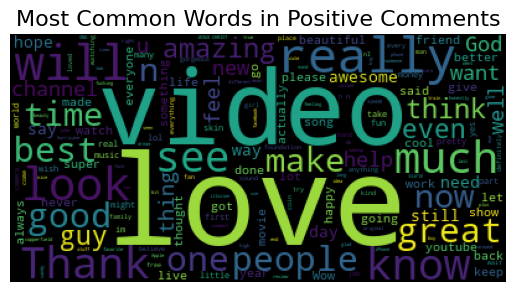

In [372]:
plt.imshow(wordcloud_positive)
plt.axis('off')
plt.title('Most Common Words in Positive Comments', fontsize=16)
plt.show()

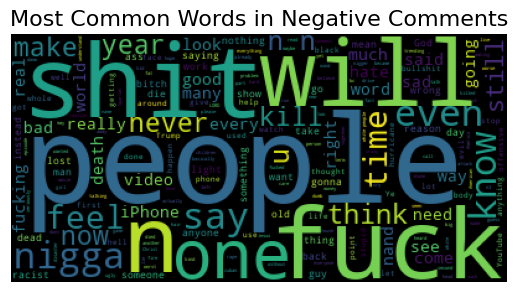

In [373]:
total_negative_comments = ''.join(comments_negative['comment_text'])
wordcloud_negative = WordCloud(stopwords = set(STOPWORDS)).generate(total_negative_comments)
plt.imshow(wordcloud_negative)
plt.axis('off')
plt.title('Most Common Words in Negative Comments', fontsize=16)
plt.show()

# Perform Emoji's Analysis 

In [267]:
!pip install emoji==2.14.1

In [268]:
sample_df.head(6)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0000


In [269]:
import emoji

emoji_info = emoji.emoji_list ('Trending 😉😊😊😊')
emoji_info

[{'match_start': 9, 'match_end': 10, 'emoji': '😉'},
 {'match_start': 10, 'match_end': 11, 'emoji': '😊'},
 {'match_start': 11, 'match_end': 12, 'emoji': '😊'},
 {'match_start': 12, 'match_end': 13, 'emoji': '😊'}]

In [270]:
[item['emoji']for item in emoji_info]

['😉', '😊', '😊', '😊']

In [271]:
all_emojis_found = []
for comment in sample_df['comment_text']:
    emoji_info = emoji.emoji_list (comment)
    emoji_found = [item['emoji'] for item in emoji_info]
    all_emojis_found.extend(emoji_found)


In [272]:
len(all_emojis_found)

2804

In [273]:
from collections import Counter

In [274]:
emoji_count_list_top10 = Counter(all_emojis_found).most_common(10)
emoji_count_list_top10 

[('😂', 610),
 ('😍', 323),
 ('❤️', 146),
 ('❤', 122),
 ('🔥', 68),
 ('😊', 68),
 ('💖', 54),
 ('😭', 52),
 ('💕', 51),
 ('👍', 41)]

In [275]:
emojis = [emoji for emoji, count in emoji_count_list_top10]
counts = [count for emoji, count in emoji_count_list_top10]


In [361]:
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.graph_objs import Layout

In [363]:
iplot({'data': [go.Bar(x=emojis, y=counts, text=counts, textposition='outside')],
       'layout': {'title': 'Emoji Usage Count', 'height': 600, 'width': 1200}})

# Collect entire data of Youtube


In [278]:
import os

In [279]:
files = os.listdir(r'C:\Users\huynh\Python\Youtube\additional_data')

In [280]:
files 

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [281]:
files_csv =[file for file in files if 'csv' in file]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [282]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [283]:
full_df = pd.DataFrame()
path = r'C:\Users\huynh\Python\Youtube\additional_data'
for file in files_csv:
    current_df = pd.read_csv(path + '/'+file,encoding = 'iso-8859-1', on_bad_lines='skip')
    full_df= pd.concat([full_df, current_df],ignore_index = True)

In [284]:
full_df.shape

(375942, 16)

# Export data to csv, json, databases

In [285]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [286]:
full_df = full_df.drop_duplicates()

In [287]:
full_df.shape

(339525, 16)

# Analysing the most liked category
### Which category has the maximum likes?

In [294]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [295]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [296]:
json_df = pd.read_json(r'C:\Users\huynh\Python\Youtube\additional_data/US_category_id.json')


In [297]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [298]:
json_df['items'].values

array([{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}},
       {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}},
       {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}},
       {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}},
       {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM1XVQ9zbGec"', '

In [299]:
json_df['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [300]:
cat_dict = {}
for i in json_df['items'].values:
    cat_dict[int(i['id'])] = i['snippet']['title'] 

In [301]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [302]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [303]:
full_df['category_name']

0                    Music
1                   Comedy
2                   Comedy
3            Entertainment
4                    Music
                ...       
375936      People & Blogs
375938      People & Blogs
375939       Entertainment
375940    Film & Animation
375941              Gaming
Name: category_name, Length: 339525, dtype: object

In [304]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


# Whichs category has the maximum likes?

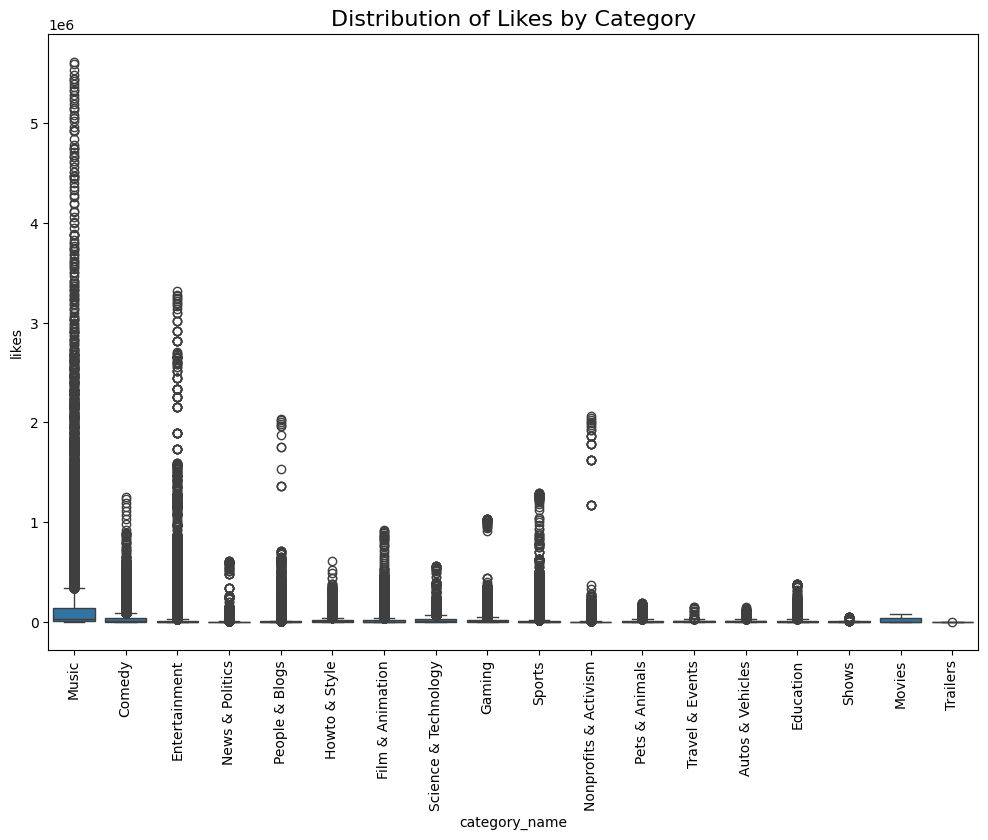

In [375]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation='vertical')
plt.title('Distribution of Likes by Category', fontsize=16)
plt.show()

# Audience is engaged or not 


In [309]:
full_df['like_rate'] =  (full_df ['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df ['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df ['comment_count']/full_df['views'])*100


In [310]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

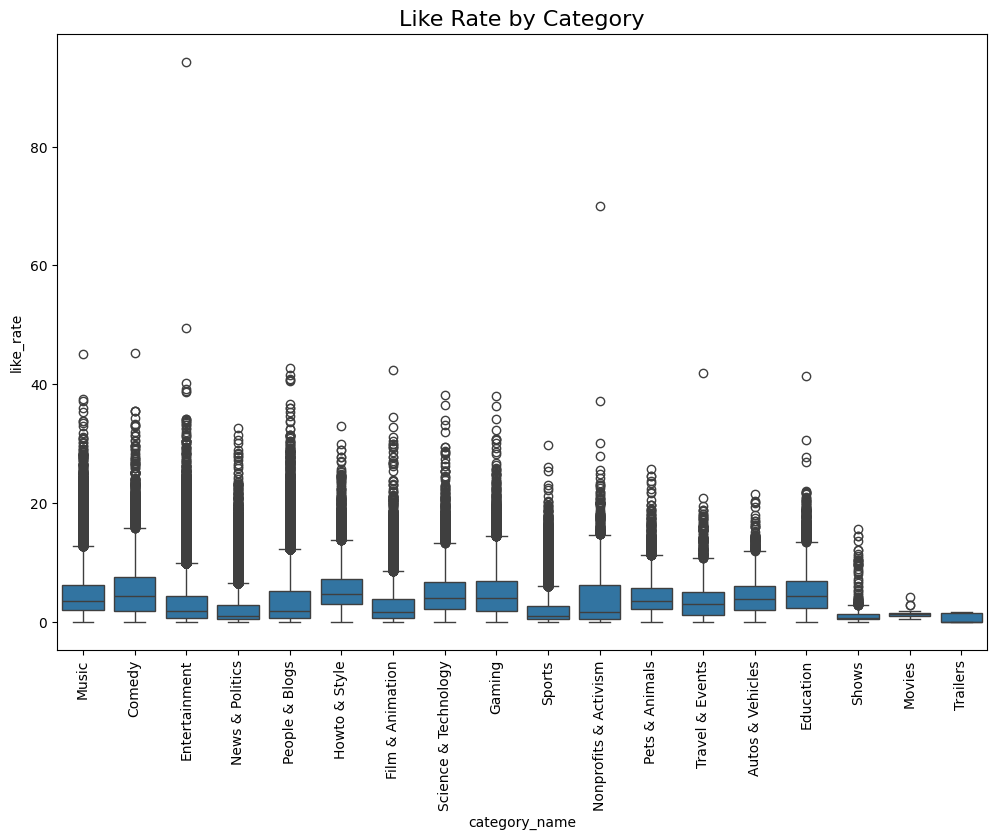

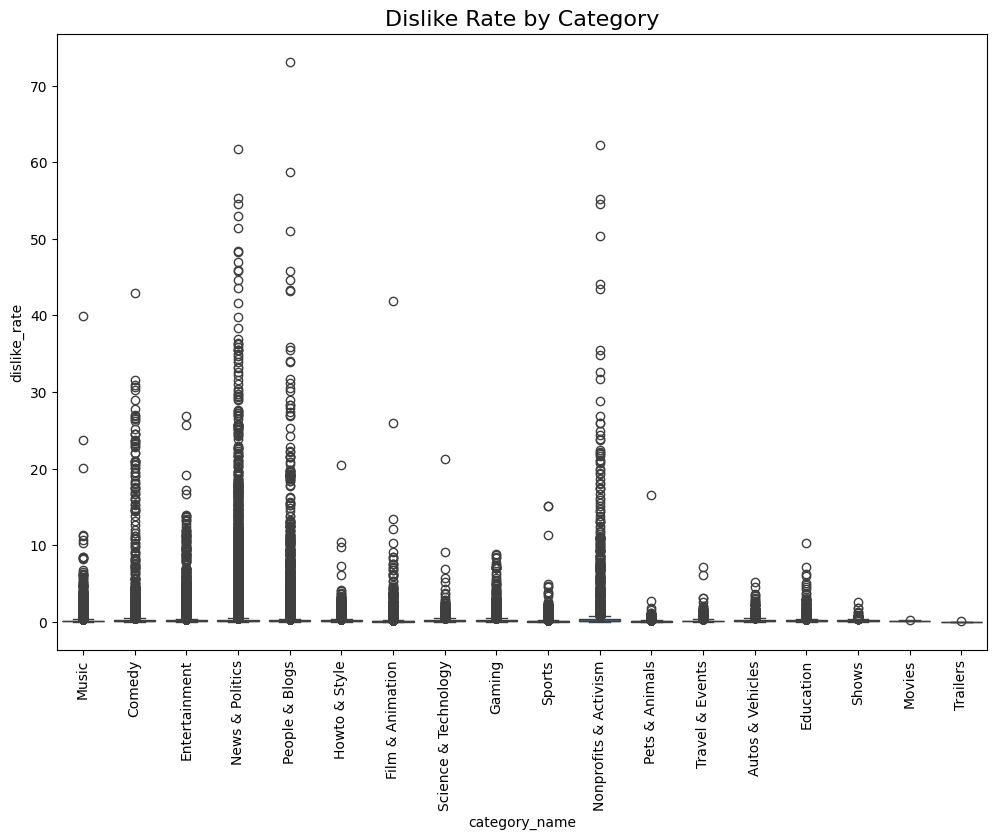

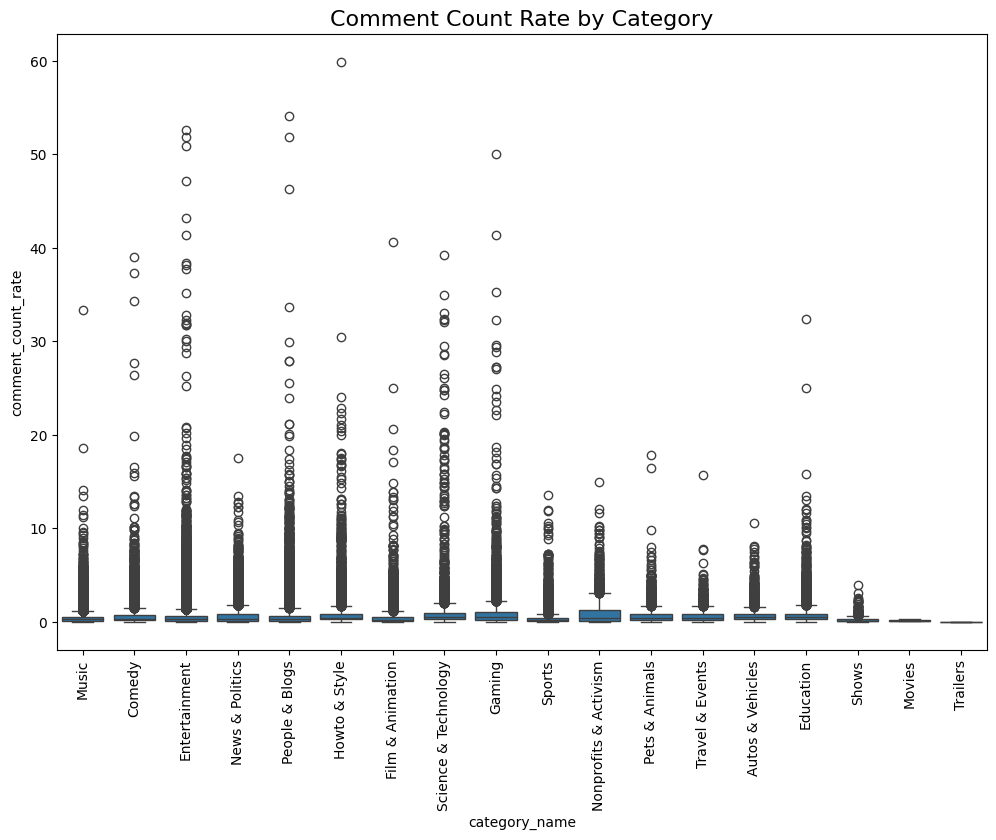

In [365]:
engagement_list = ['like_rate','dislike_rate', 'comment_count_rate']
titles = ['Like Rate by Category', 'Dislike Rate by Category', 'Comment Count Rate by Category']

for i, title in zip(engagement_list, titles):
    plt.figure(figsize=(12,8))
    sns.boxplot(x='category_name', y=i, data=full_df)
    plt.xticks(rotation='vertical')
    plt.title(title, fontsize=16)
    plt.show()

Text(0.5, 1.0, 'Relationship between Views and Likes')

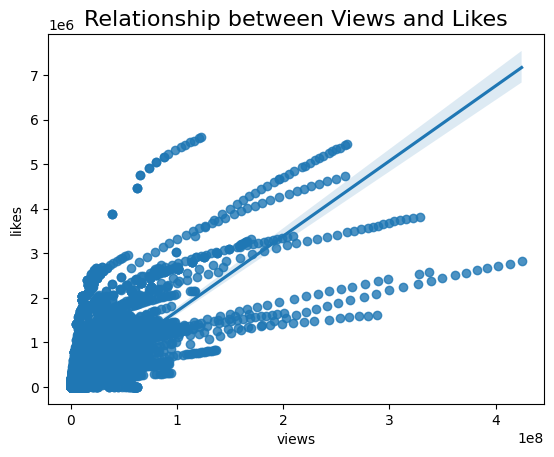

In [366]:
sns.regplot(x='views', y='likes', data=full_df)
plt.title('Relationship between Views and Likes', fontsize=16)

In [316]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [318]:
full_df[['views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


Text(0.5, 1.0, 'Heatmap: Relationship between Views and Likes')

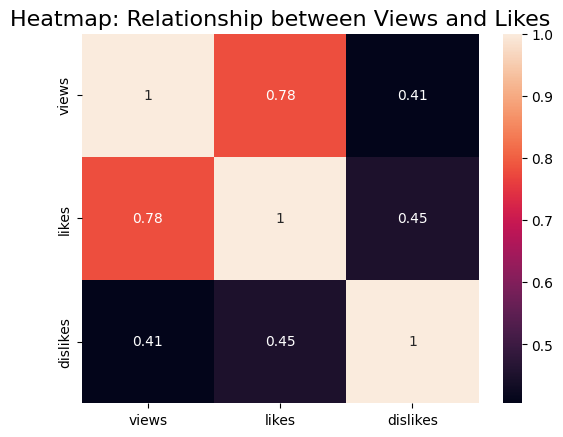

In [367]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot = True)
plt.title('Heatmap: Relationship between Views and Likes', fontsize=16)

# Analysing trend videos of Youtube

In [321]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752


In [340]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending =False).reset_index()
cdf = cdf.rename(columns = {0:'total_videos'})
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Tesoros Enterrados,1
37820,Anton Neverov,1
37821,Thalia 444,1
37822,Thaitv6 Official,1


In [338]:
import plotly.express as px

In [368]:
px.bar(data_frame=cdf[0:20], x='channel_title', y='total_videos', 
       text='total_videos', title='Top 20 Channels by Total Videos')


#  Does Punctuation in the title and tas have any relation with view likes, dislikes, comments?

In [347]:
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [348]:
import string

In [349]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [351]:
len ([char for char in full_df['title'][0] if char in string.punctuation])

4

In [352]:
def punc_count(text):
    return len ([char for char in text if char in string.punctuation])

In [354]:
full_df ['count_punc'] = full_df['title'].apply(punc_count)

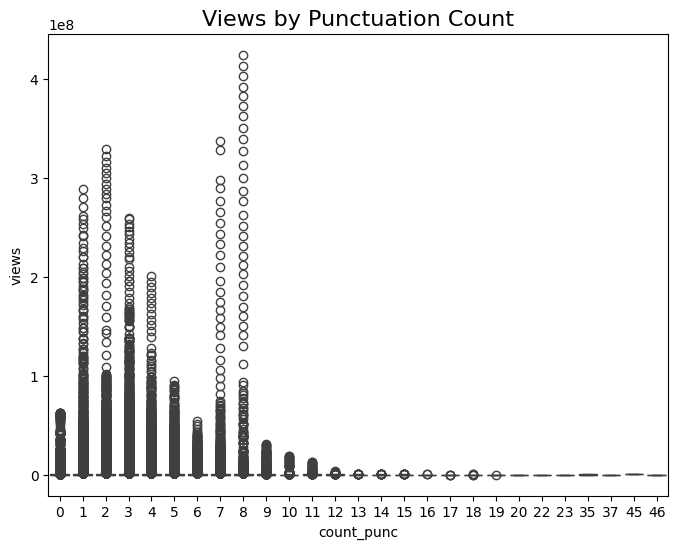

In [370]:
plt.figure(figsize= (8,6))
sns.boxplot(x = 'count_punc', y = 'views', data = full_df)
plt.title('Views by Punctuation Count', fontsize=16)
plt.show()